In [9]:
import DataLoadandPrep
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from torch.utils.data import DataLoader

img_basedir = "G:\\Docs\\VCU\\Research\\Normative T1\\extracted_data\\images_T1\\"
mask_basedir = "G:\\Docs\\VCU\\Research\\Normative T1\\extracted_data\\ROI_PAS\\"
image_files_df = pd.read_csv("image_file_data.csv")
msk_files_df = pd.read_csv("Mask_file_data.csv")
inputs = []
targets = []

for i in range(90):
    Base_img = img_basedir + image_files_df['Base_img'].loc[i]
    Base_msk = mask_basedir + msk_files_df['Base_msk'].loc[i]
    
    inputs.append(Base_img)
    targets.append(Base_msk)

training_dataset = DataLoadandPrep.SegmentationDataSet(inputs=inputs,targets=targets,transform=None)

training_dataloader = DataLoader(dataset=training_dataset ,batch_size=90, shuffle=True)



x,y = next(iter(training_dataloader))

print(f'x = shape: {x.shape}; type: {x.dtype}')
print(f'x = min: {x.min()}; max: {x.max()}')
print(f'y = shape: {y.shape}; class: {y.unique()}; type: {y.dtype}')
print(f'x = min: {y.min()}; max: {y.max()}')


#plt.imshow(x[0,:,:]+8000*y[0,:,:])


x = shape: torch.Size([90, 100, 100]); type: torch.float32
x = min: 0.0; max: 4095.0
y = shape: torch.Size([90, 100, 100]); class: tensor([0, 1]); type: torch.int64
x = min: 0; max: 1


C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


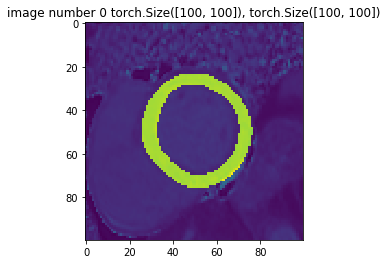

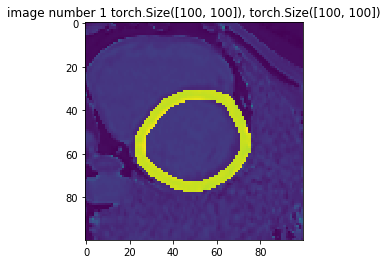

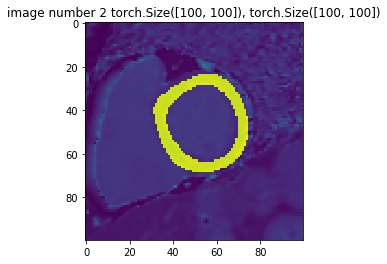

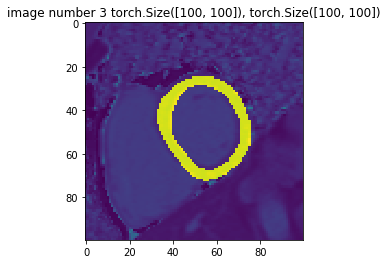

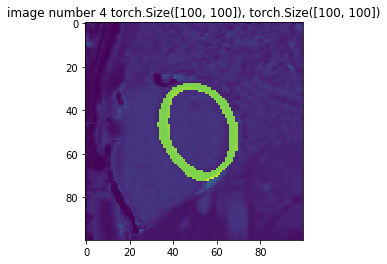

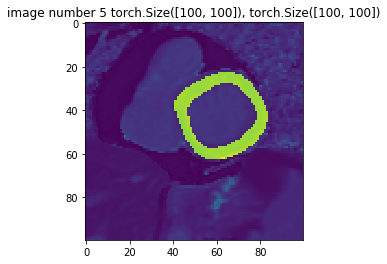

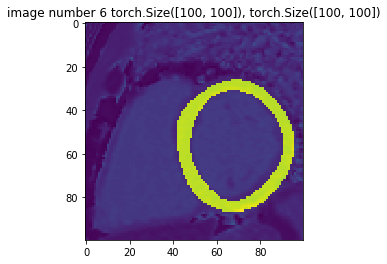

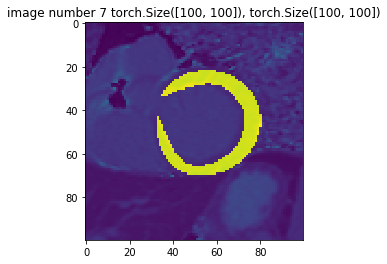

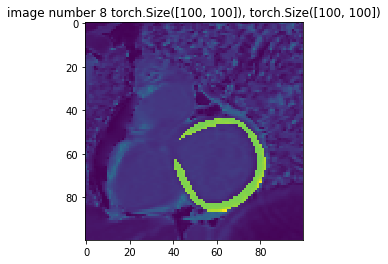

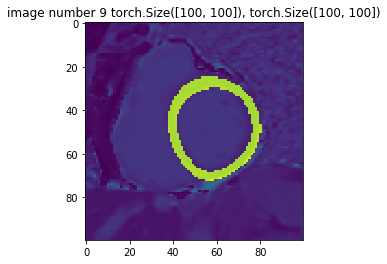

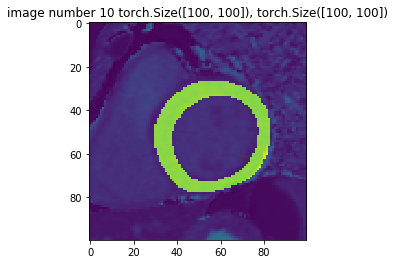

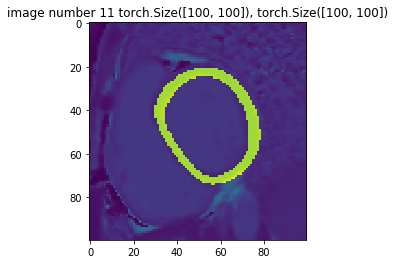

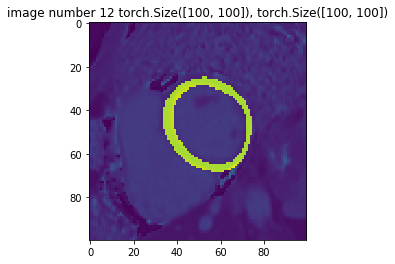

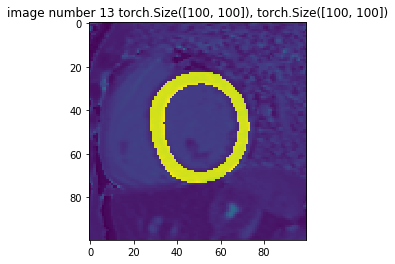

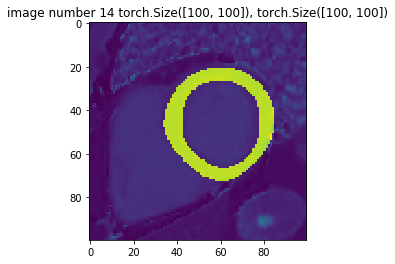

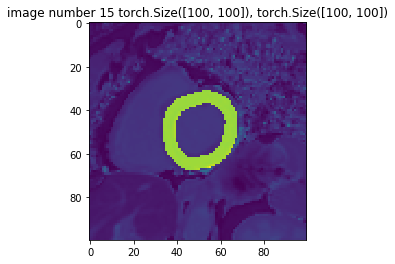

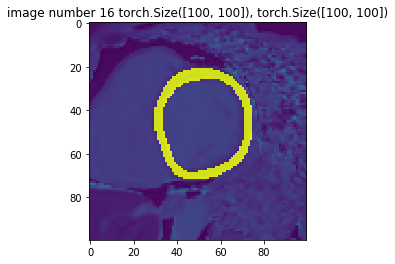

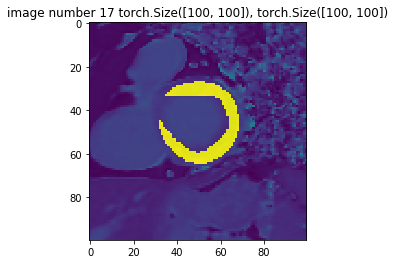

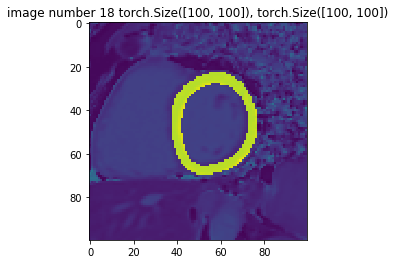

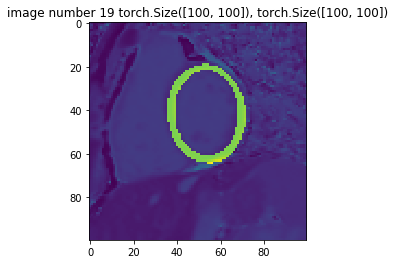

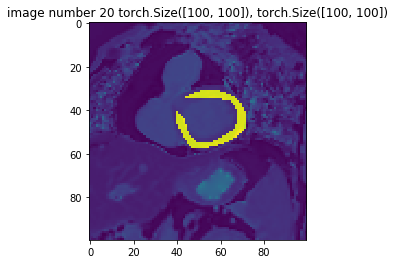

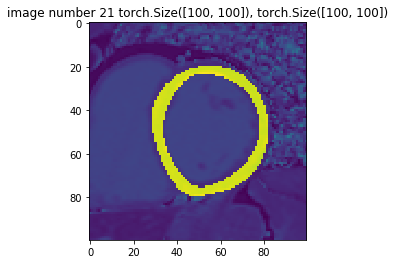

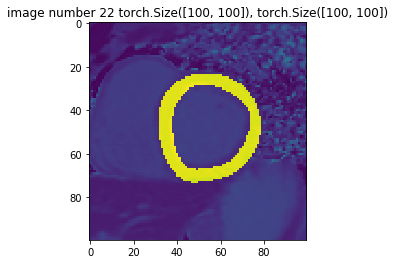

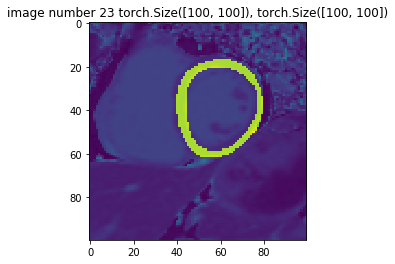

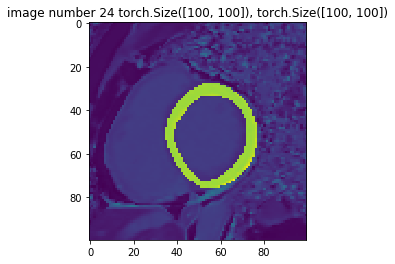

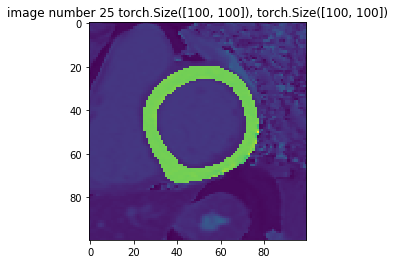

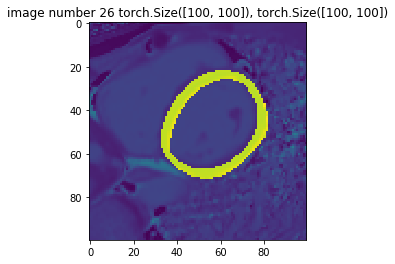

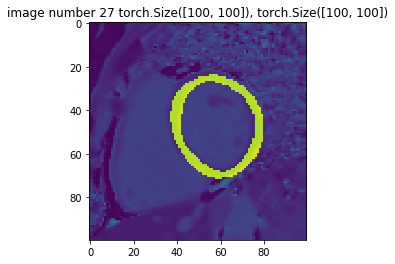

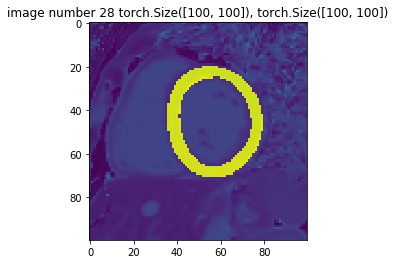

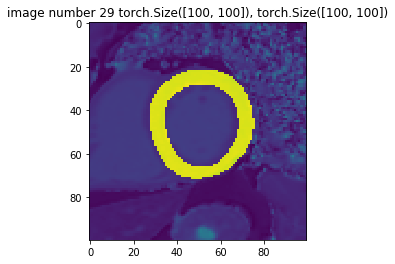

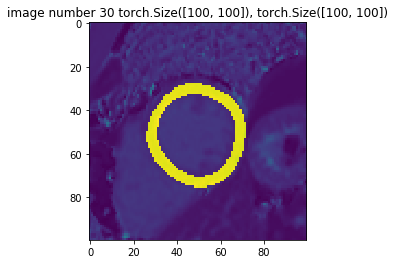

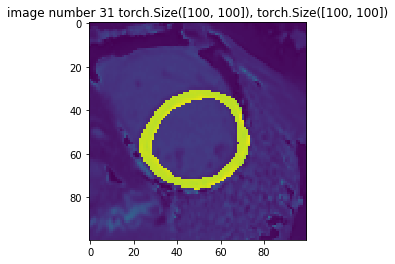

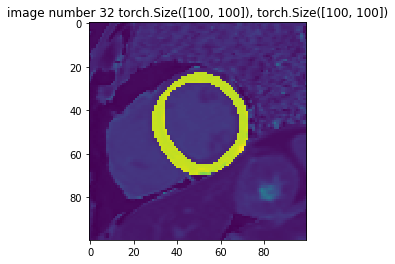

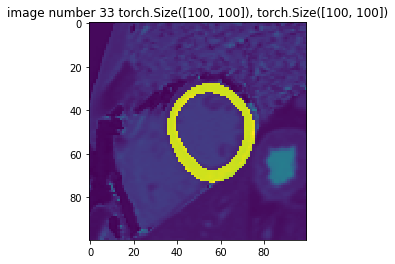

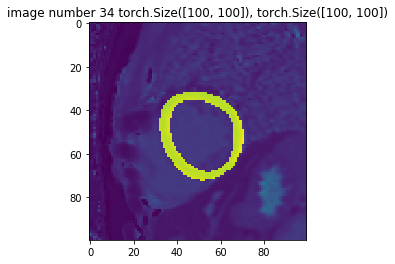

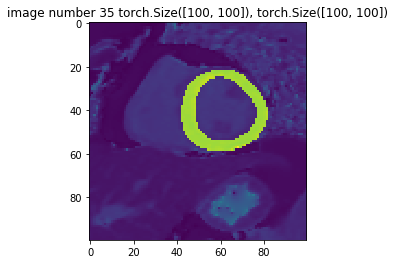

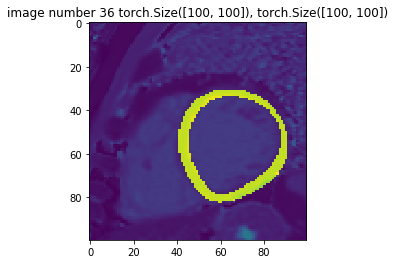

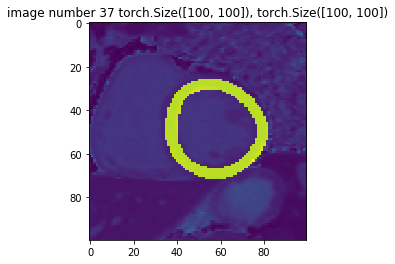

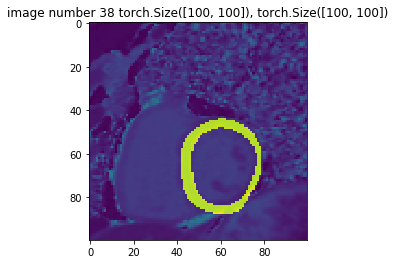

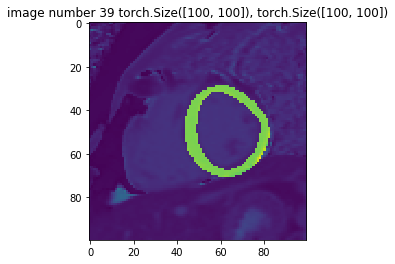

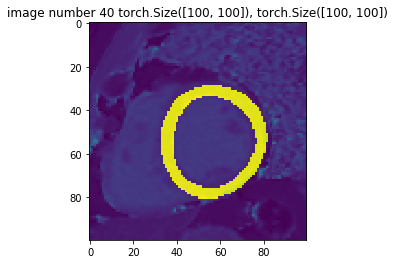

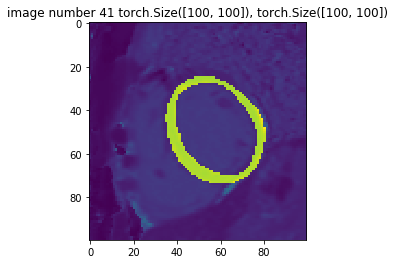

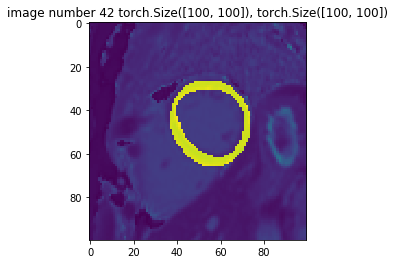

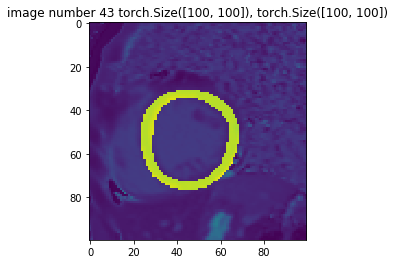

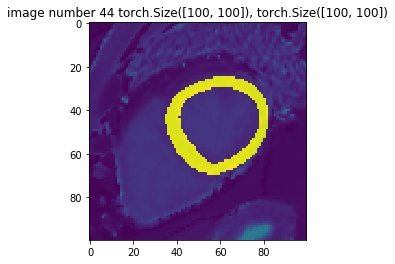

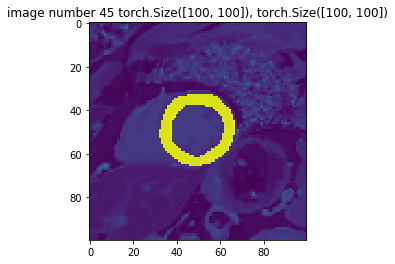

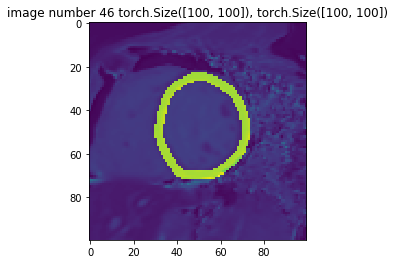

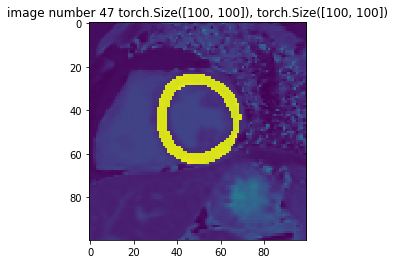

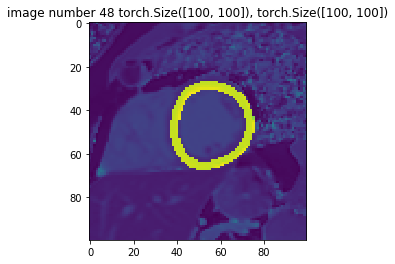

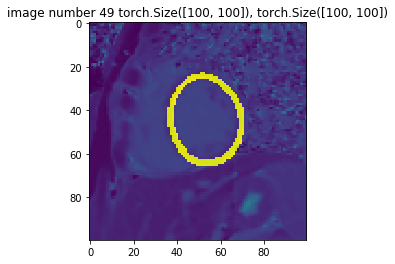

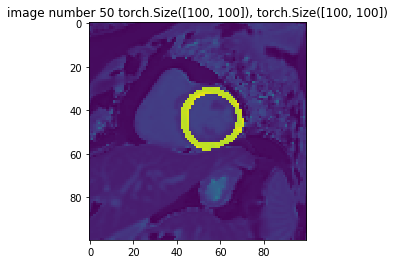

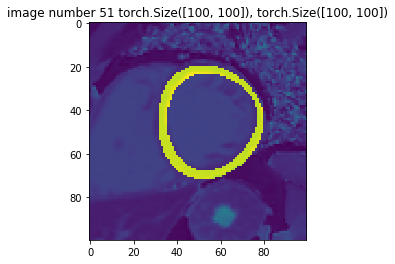

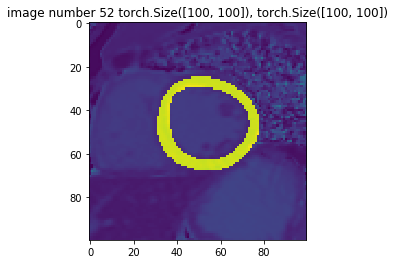

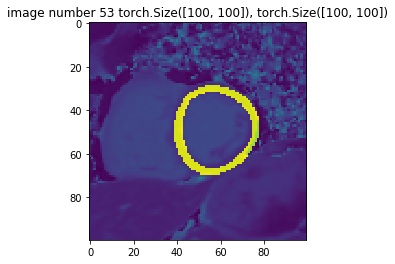

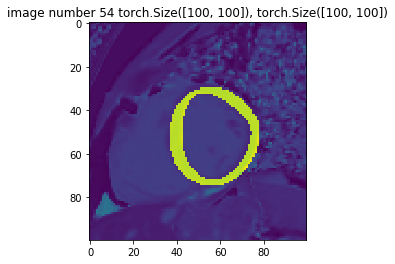

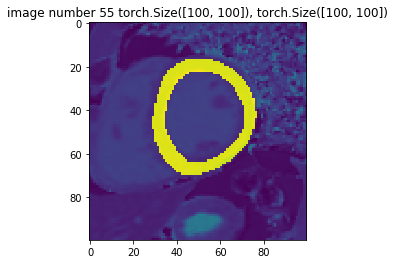

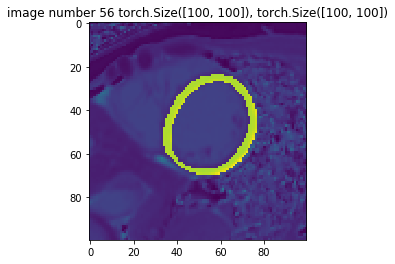

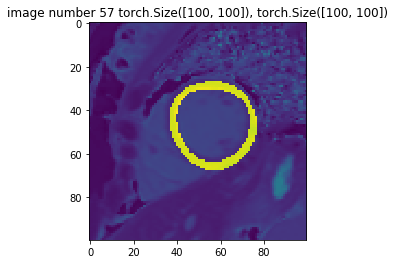

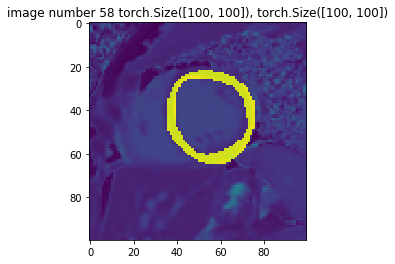

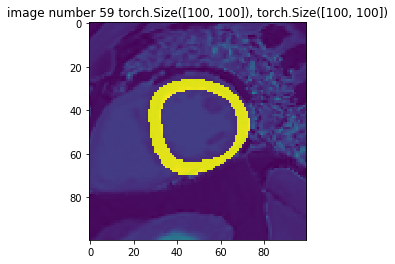

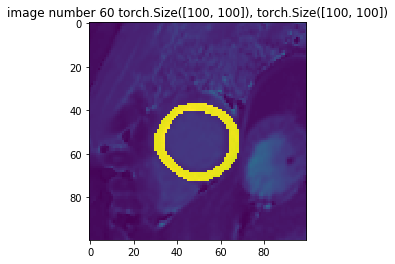

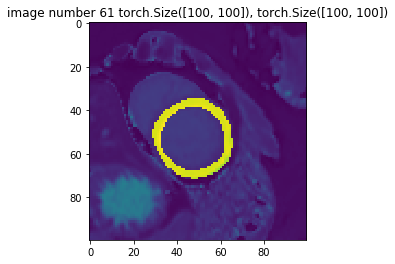

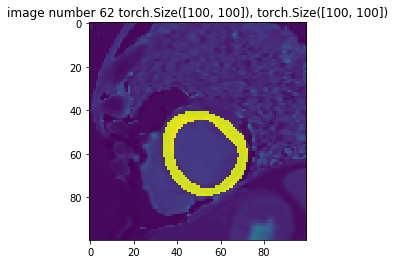

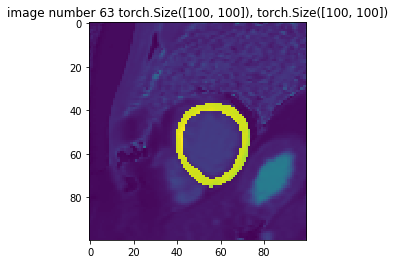

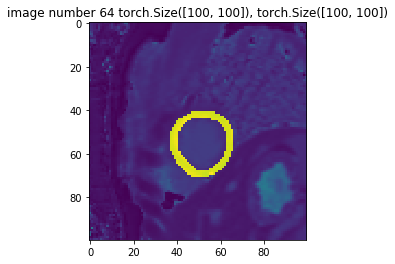

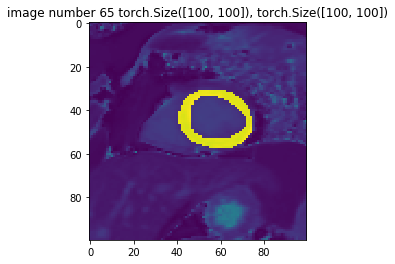

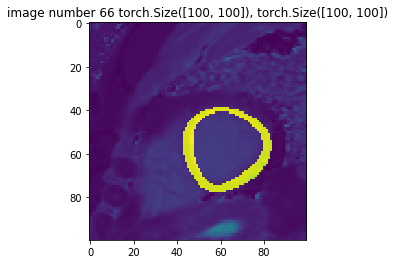

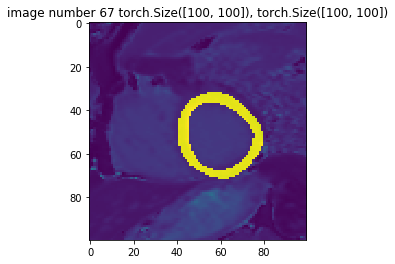

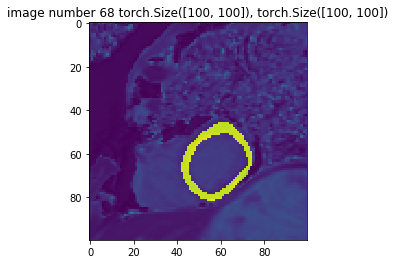

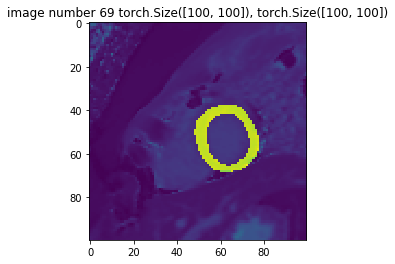

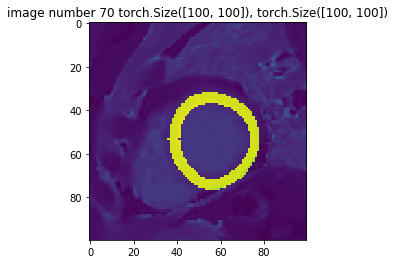

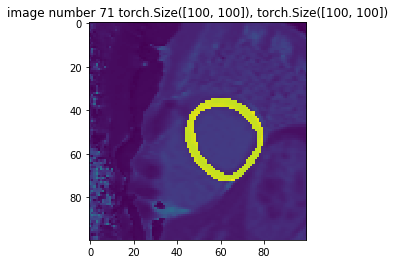

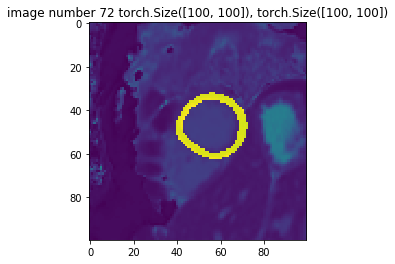

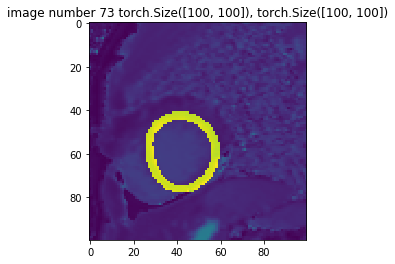

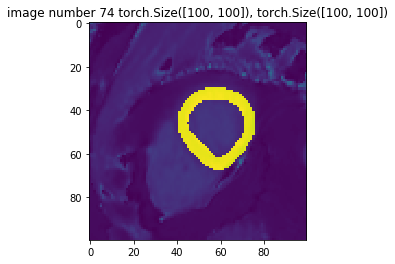

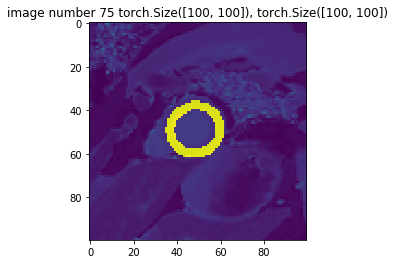

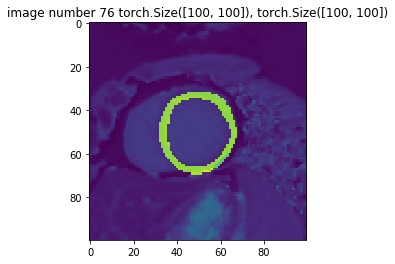

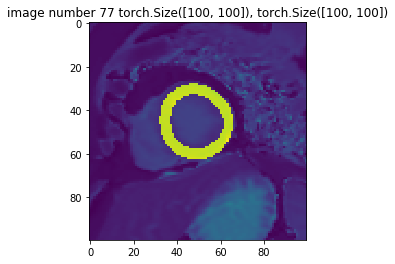

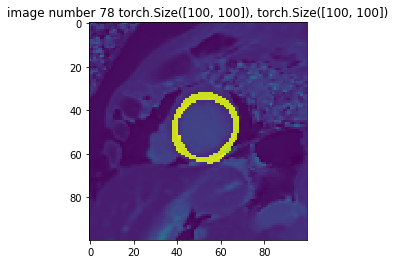

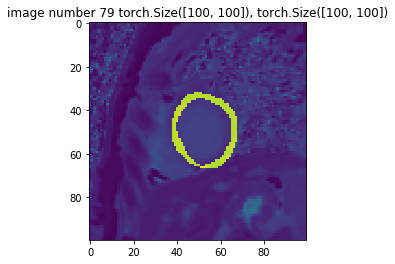

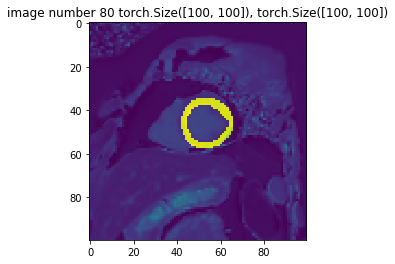

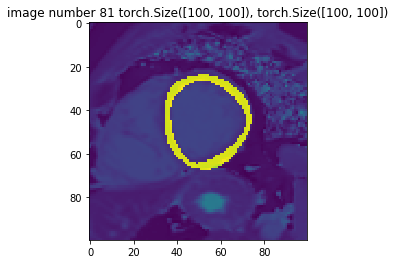

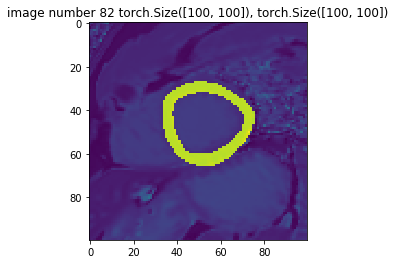

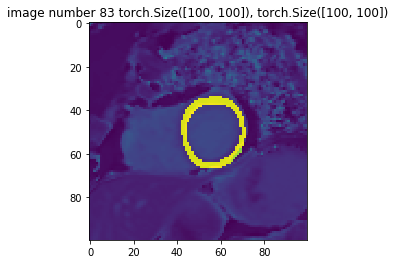

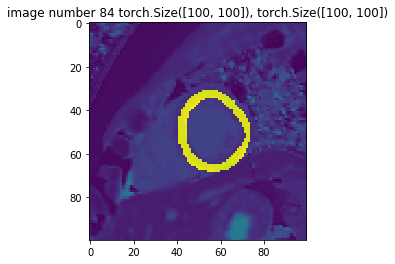

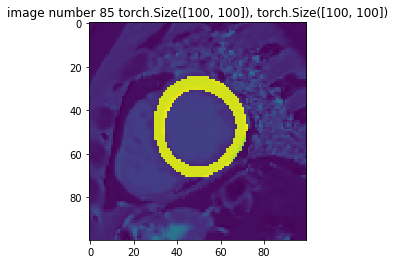

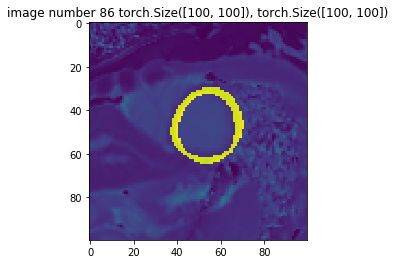

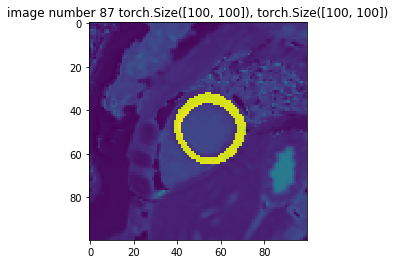

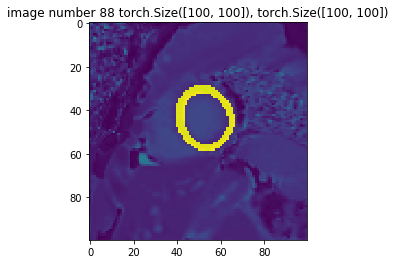

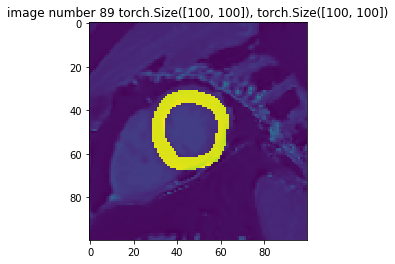

In [11]:
for i in range(90):
    x,y = training_dataset.__getitem__(i)
    
    plt.figure()
    plt.imshow(x+8000*y)
    plt.title(f'image number {i} {x.shape}, {y.shape}')
#     print(f' {i} {x.shape}, {y.shape}')

In [7]:
#Test the ransform

import numpy as np
from skimage.transform import resize
from transformations import ComposeDouble, center_crop_to_size, FunctionWrapperDouble, create_dense_target, normalize_01

x = np.random.randint(0, 256, size=(128, 128), dtype=np.uint8)
y = np.random.randint(10, 15, size=(128, 128), dtype=np.uint8)

transforms = ComposeDouble([
    FunctionWrapperDouble(resize,
                          input=True,
                          target=False,
                          output_shape=(128, 128)),
    FunctionWrapperDouble(resize,
                          input=False,
                          target=True,
                          output_shape=(128, 128),
                          order=0,
                          anti_aliasing=False,
                          preserve_range=True),
    FunctionWrapperDouble(create_dense_target, input=False, target=True),
    FunctionWrapperDouble(np.moveaxis, input=True, target=False, source=-1, destination=0),
    FunctionWrapperDouble(normalize_01),
    FunctionWrapperDouble(center_crop_to_size, size = (100,100)),
])

x_t, y_t = transforms(x, y)

print(f'x = shape: {x.shape}; type: {x.dtype}')
print(f'x = min: {x.min()}; max: {x.max()}')
print(f'x_t: shape: {x_t.shape}  type: {x_t.dtype}')
print(f'x_t = min: {x_t.min()}; max: {x_t.max()}')

print(f'y = shape: {y.shape}; class: {np.unique(y)}')
print(f'y_t = shape: {y_t.shape}; class: {np.unique(y_t)}')


x = shape: (128, 128); type: uint8
x = min: 0; max: 255
x_t: shape: (100, 100)  type: float64
x_t = min: 0.0; max: 0.9999999999999998
y = shape: (128, 128); class: [10 11 12 13 14]
y_t = shape: (128, 128); class: [0. 1. 2. 3. 4.]
